Chapter 2 – Group Exercise 1  
Data Preprocessing on a Real Dataset

Group Members
- Janvi Mahapadi
- Devendra Ghawat
- Kshitija Satpute

## Dataset Information


## Dataset Information

**Dataset Name:** Adult Census Income Dataset  

**Source:**  
UCI Machine Learning Repository  
https://archive.ics.uci.edu/ml/datasets/adult  

**Description:**  
The Adult Census Income dataset contains demographic and employment-related information
about individuals. The objective of the dataset is to predict whether a person earns
more than 50K USD per year based on attributes such as age, education, occupation,
working hours, and capital gain/loss.


Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week",
    "native_country", "income"
]


In [4]:
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

df_train = pd.read_csv(
    train_url,
    names=columns,
    sep=r",\s*",
    engine="python",
    na_values="?"
)

df_test = pd.read_csv(
    test_url,
    names=columns,
    sep=r",\s*",
    engine="python",
    skiprows=1,
    na_values="?"
)

df = pd.concat([df_train, df_test], ignore_index=True)


In [5]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()


In [6]:
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape


(48842, 15)

Task 1: Handling Missing Values

In [8]:
df.isna().sum()


,0
age,0
workclass,2799
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,2809
relationship,0
race,0
sex,0


### Missing Values Analysis

Missing values are present in the following categorical features:
- Workclass
- Occupation
- Native Country

These missing values are represented as "?" in the raw dataset and were
automatically converted to NaN during data loading.


In [9]:
categorical_cols = ["workclass", "occupation", "native_country"]

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3148166472.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [10]:
df.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


Task 2: Scaling Numerical Features


In [11]:
df.select_dtypes(include=["int64", "float64"]).columns


Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

### Feature Scaling

Numerical features have different ranges and units.
Scaling ensures that no feature dominates others due to magnitude differences,
which is especially important for distance-based and gradient-based algorithms.


In [12]:
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'fnlwgt', 'education_num',
            'capital_gain', 'capital_loss', 'hours_per_week']

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df[num_cols])


In [13]:
df_standardized[num_cols].describe().loc[['mean', 'std']]


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
mean,2.275273e-16,-5.644539e-17,-9.019624e-17,1.018345e-17,-9.892491e-18,4.568003e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00


In [14]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[num_cols] = minmax.fit_transform(df[num_cols])


In [15]:
df_normalized[num_cols].describe().loc[['min', 'max']]


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
min,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


### Standardization vs Normalization

Standardization centers data around zero with unit variance and is useful when
features follow a normal distribution.

Normalization rescales values between 0 and 1 and is useful when features have
different scales and no assumption of distribution is made.


Task 3: Handling Noise


In [16]:
import numpy as np

np.random.seed(42)

df_noise = df.copy()

df_noise["hours_per_week_noisy"] = (
    df_noise["hours_per_week"]
    + np.random.normal(0, 2, size=len(df_noise))
)


In [17]:
df_noise["hours_per_week_smooth"] = (
    df_noise["hours_per_week_noisy"]
    .rolling(window=5)
    .mean()
)


In [18]:
df_noise[
    ["hours_per_week",
     "hours_per_week_noisy",
     "hours_per_week_smooth"]
].head(10)


,hours_per_week,hours_per_week_noisy,hours_per_week_smooth
0,40,40.993428,NaN
1,13,12.723471,NaN
2,40,41.295377,NaN
3,40,43.046060,NaN
4,40,39.531693,35.518006
5,40,39.531726,35.225666
6,16,19.158426,36.512656
7,45,46.534869,37.560555
8,50,49.061051,38.763553
9,40,41.085120,39.074238


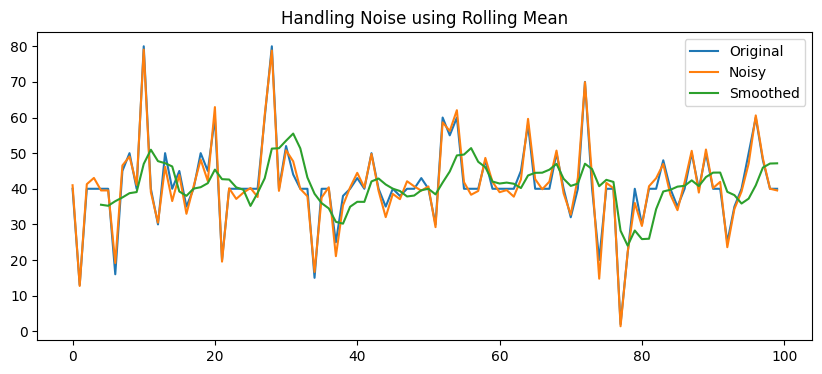

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df_noise["hours_per_week"][:100], label="Original")
plt.plot(df_noise["hours_per_week_noisy"][:100], label="Noisy")
plt.plot(df_noise["hours_per_week_smooth"][:100], label="Smoothed")
plt.legend()
plt.title("Handling Noise using Rolling Mean")
plt.show()


### Handling Noise

Artificial noise was added to the `hours_per_week` feature to simulate real-world
data imperfections. A rolling mean smoothing technique was applied to reduce
random fluctuations while preserving the overall data trend.


Task 4: Handling Outliers


In [21]:
from scipy.stats import zscore

df_outliers = df.copy()

df_outliers['capital_gain_zscore'] = zscore(df_outliers['capital_gain'])

outliers = df_outliers[abs(df_outliers['capital_gain_zscore']) > 3]
outliers.shape[0]


331

In [22]:
outliers[['capital_gain']].describe()


,capital_gain
count,331.000000
mean,81106.731118
std,31730.206809
min,25124.000000
25%,34095.000000
50%,99999.000000
75%,99999.000000
max,99999.000000


In [23]:
lower_limit = df_outliers['capital_gain'].quantile(0.01)
upper_limit = df_outliers['capital_gain'].quantile(0.99)

df_outliers['capital_gain_capped'] = df_outliers['capital_gain'].clip(
    lower_limit,
    upper_limit
)


In [24]:
df_outliers[['capital_gain', 'capital_gain_capped']].describe()


,capital_gain,capital_gain_capped
count,48842.000000,48842.000000
mean,1079.067626,625.767331
std,7452.019058,2501.944450
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,15024.000000


### Handling Outliers

Outliers were detected in the `capital_gain` feature using the Z-score method
with a threshold of ±3. Extreme values were handled using capping at the 1st
and 99th percentiles. This approach reduces the influence of outliers while
preserving all data records.


Task 5: Feature Selection


In [25]:
df_fs = df_outliers.copy()

df_fs['income_binary'] = df_fs['income'].apply(
    lambda x: 1 if '>50K' in x else 0
)


In [26]:
numerical_features = [
    'age', 'education_num', 'hours_per_week',
    'capital_gain_capped', 'capital_loss'
]

df_fs[numerical_features + ['income_binary']].head()


,age,education_num,hours_per_week,capital_gain_capped,capital_loss,income_binary
0,39,13,40,2174,0,0
1,50,13,13,0,0,0
2,38,9,40,0,0,0
3,53,7,40,0,0,0
4,28,13,40,0,0,0


In [27]:
correlation = df_fs[numerical_features + ['income_binary']].corr()

correlation['income_binary'].sort_values(ascending=False)


,income_binary
income_binary,1.000000
capital_gain_capped,0.345034
education_num,0.332613
age,0.230369
hours_per_week,0.227687
capital_loss,0.147554


<Axes: title={'center': 'Feature Correlation with Income'}>

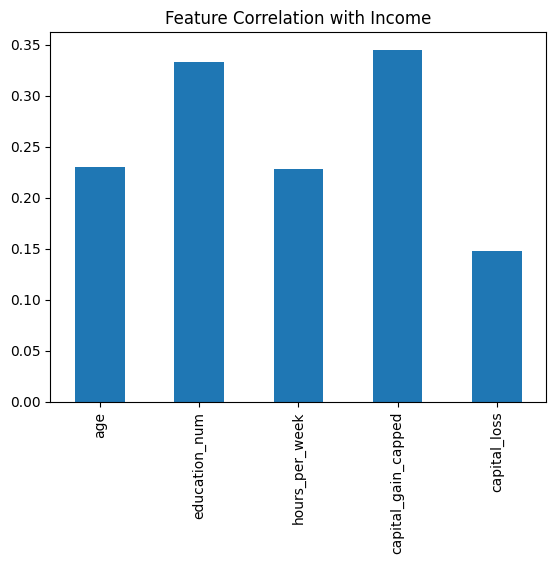

In [28]:
correlation['income_binary'].drop('income_binary').plot(
    kind='bar',
    title='Feature Correlation with Income'
)


### Feature Selection

A filter-based feature selection method using correlation was applied.
Features with higher correlation to the target variable (`income_binary`)
were considered more informative. This method is simple, fast, and effective
for identifying relevant numerical features.


## Conclusion

In this project, data preprocessing techniques were applied to the Adult Census
Income dataset. Missing values were handled using mode imputation for categorical
features. Numerical features were scaled using Z-score standardization and
Min–Max normalization. Artificial noise was added and smoothed using a rolling
mean technique. Outliers were detected using Z-score and handled through capping.
Finally, correlation-based feature selection was used to identify the most
important features for predicting income.
